Problem definition:
This is a binary classification problem which classifies the dropout or   consistent student using various feature selection techniques and algorithms.  

Tools:
> Python   
> sklearn   

Techniques: 
> Feature selection:
1. Correlation
2. Select K-Best















In [ ]:
# python version
print('Python version is:')
!python --version

Python version is:
Python 3.7.15


In [ ]:
# basic principal python librabries 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import sys
# sklearn for preprocessing
from sklearn.model_selection import train_test_split,StratifiedKFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import confusion_matrix
# sklearn feature selection module
from sklearn.feature_selection import mutual_info_regression, mutual_info_classif
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.feature_selection import RFECV
from sklearn.feature_selection import RFE
#sklearn algorithms
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier



import warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Dataset.csv')
data.head()

,index,SEM 1 SGPA,SEM 1 KT,SEM 2 SGPA,SEM 2 KT,SEM 3 SGPA,SEM 3 KT,SEM 4 SGPA,SEM 4 KT,SEM 5 SGPA,...,2_hrs_lect,Submissions,5_hrs_lect,5_hrs_pracs,Coaching_classes,Teacher's Feedback,Label,Scocial_Skills,Average pointer,Cleaned_Feedback
0,0,7.10,0,6.85,0,7.20,1.0,7.30,0.0,7.60,...,0,0,0,0,0,Disciplined and hard working,1,0,7.13125,disciplin hard work
1,1,7.20,0,7.10,0,6.11,0.0,6.67,0.0,7.14,...,1,1,0,0,1,Good leadership skills,1,1,7.05375,good leadership skill
2,2,3.80,4,4.20,2,4.20,1.0,3.80,2.0,4.35,...,0,1,0,0,0,Very talkative and Poor attendance,0,0,4.05875,talkat poor attend
3,3,6.91,1,6.60,2,5.82,1.0,6.10,0.0,7.71,...,0,1,0,1,0,Respectful to Authority and Others,1,0,6.50500,respect author other
4,4,3.50,1,3.40,2,4.00,2.0,4.10,2.0,3.63,...,0,0,0,0,0,Bunk lectuer,0,0,3.81500,bunk lectuer


In [ ]:
data.drop('index',inplace=True,axis=1)
# data

In [ ]:
# independent features in the dataset
data.columns

Index(['SEM 1 SGPA', 'SEM 1 KT', 'SEM 2 SGPA', 'SEM 2 KT', 'SEM 3 SGPA',
       'SEM 3 KT', 'SEM 4 SGPA', 'SEM 4 KT', 'SEM 5 SGPA', 'SEM 5 KT',
       'SEM 6 SGPA', 'SEM 6 KT', 'SEM 7 SGPA', 'SEM 7 KT', 'SEM 8 SGPA',
       'Hours_On_Assignment', 'Hours_On_Studies', 'Travel_Time', 'Attendance',
       'Internet_Availability', 'Internet_Speed', 'Mode_Of_Transportation',
       '2_hrs_lect', 'Submissions', '5_hrs_lect', '5_hrs_pracs',
       'Coaching_classes', 'Teacher's Feedback', 'Label', 'Scocial_Skills',
       'Average pointer', 'Cleaned_Feedback'],
      dtype='object')

In [ ]:
#number of columns
len(data.columns)

32

In [ ]:
#numerical columns
numerical = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
data_num = data.select_dtypes(include=numerical)

In [ ]:

data_num.select_dtypes(include = numerical).columns.tolist()


['SEM 1 SGPA',
 'SEM 1 KT',
 'SEM 2 SGPA',
 'SEM 2 KT',
 'SEM 3 SGPA',
 'SEM 3 KT',
 'SEM 4 SGPA',
 'SEM 4 KT',
 'SEM 5 SGPA',
 'SEM 5 KT',
 'SEM 6 SGPA',
 'SEM 6 KT',
 'SEM 7 SGPA',
 'SEM 7 KT',
 'SEM 8 SGPA',
 'Hours_On_Assignment',
 'Hours_On_Studies',
 'Travel_Time',
 'Attendance',
 'Internet_Availability',
 'Internet_Speed',
 'Mode_Of_Transportation',
 '2_hrs_lect',
 'Submissions',
 '5_hrs_lect',
 '5_hrs_pracs',
 'Coaching_classes',
 'Label',
 'Scocial_Skills',
 'Average pointer']

In [ ]:
#number of numerical columns
print(len(data.select_dtypes(include = numerical).columns.tolist()))


30


In [ ]:
# categorical columns
data.select_dtypes(include = 'object').columns.tolist()

["Teacher's Feedback", 'Cleaned_Feedback']

In [ ]:
#number of categorical columns
print(len(data.select_dtypes(include = 'object').columns.tolist()))

2


In [ ]:
data.drop(["Cleaned_Feedback","Teacher's Feedback"],axis=1,inplace=True)

# statistical view of dataset




In [ ]:
data.describe()

,SEM 1 SGPA,SEM 1 KT,SEM 2 SGPA,SEM 2 KT,SEM 3 SGPA,SEM 3 KT,SEM 4 SGPA,SEM 4 KT,SEM 5 SGPA,SEM 5 KT,...,Internet_Speed,Mode_Of_Transportation,2_hrs_lect,Submissions,5_hrs_lect,5_hrs_pracs,Coaching_classes,Label,Scocial_Skills,Average pointer
count,260.000000,262.000000,262.000000,262.000000,261.000000,260.000000,262.000000,261.000000,262.000000,262.000000,...,262.0,262.000000,262.000000,262.000000,262.000000,262.000000,262.000000,262.000000,262.000000,259.000000
mean,6.017885,0.770992,6.025954,0.839695,5.890728,0.811538,5.961412,0.521073,6.106794,0.003817,...,0.0,1.660305,0.290076,0.751908,0.339695,0.412214,0.114504,0.618321,0.148855,6.014662
std,1.799840,0.926948,1.829858,0.916572,1.708067,0.912727,1.786112,0.834667,1.752587,0.061780,...,0.0,0.863849,0.454666,0.432732,0.474512,0.493175,0.319032,0.486728,0.356627,1.693180
min,3.200000,0.000000,3.200000,0.000000,3.200000,0.000000,3.100000,0.000000,3.000000,0.000000,...,0.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.631250
25%,4.230000,0.000000,4.202500,0.000000,4.300000,0.000000,4.202500,0.000000,4.457500,0.000000,...,0.0,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.208750
50%,6.000000,0.000000,6.085000,1.000000,5.900000,1.000000,6.085000,0.000000,6.150000,0.000000,...,0.0,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,6.183750
75%,7.560000,1.000000,7.485000,2.000000,7.220000,1.250000,7.300000,1.000000,7.500000,0.000000,...,0.0,3.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,7.511250
max,9.580000,4.000000,10.000000,3.000000,10.000000,4.000000,9.800000,3.000000,9.900000,1.000000,...,0.0,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,9.732500


# Overall view of dataset

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 262 entries, 0 to 261
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   SEM 1 SGPA              260 non-null    float64
 1   SEM 1 KT                262 non-null    int64  
 2   SEM 2 SGPA              262 non-null    float64
 3   SEM 2 KT                262 non-null    int64  
 4   SEM 3 SGPA              261 non-null    float64
 5   SEM 3 KT                260 non-null    float64
 6   SEM 4 SGPA              262 non-null    float64
 7   SEM 4 KT                261 non-null    float64
 8   SEM 5 SGPA              262 non-null    float64
 9   SEM 5 KT                262 non-null    int64  
 10  SEM 6 SGPA              262 non-null    float64
 11  SEM 6 KT                255 non-null    float64
 12  SEM 7 SGPA              262 non-null    float64
 13  SEM 7 KT                262 non-null    int64  
 14  SEM 8 SGPA              262 non-null    fl

## Exploratory data analysis(EDA)

Target(dependent variable)

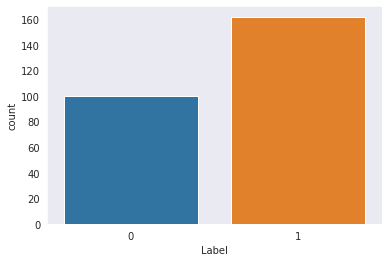

In [ ]:
sns.set_style("dark")
sns.countplot(data['Label'])
plt.show()

▶ Dataset contains balanced classes of 0 and 1


*  Here 1 represents desciplined student
*  0 represents the dropout student





Semister Grade Point Average(SGPA) and KT




In [ ]:
sgpa_data = data.iloc[:,:16:2]


In [ ]:
sgpa_cols = sgpa_data.columns

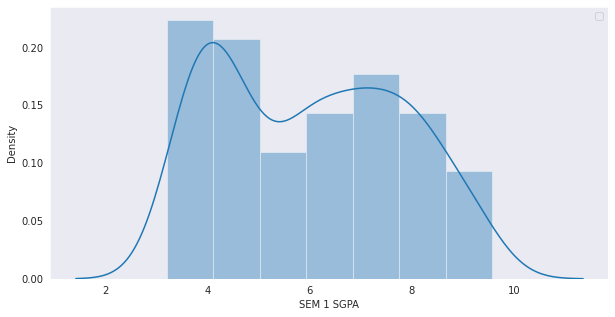

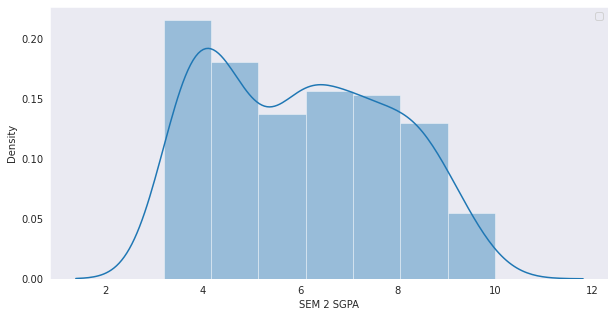

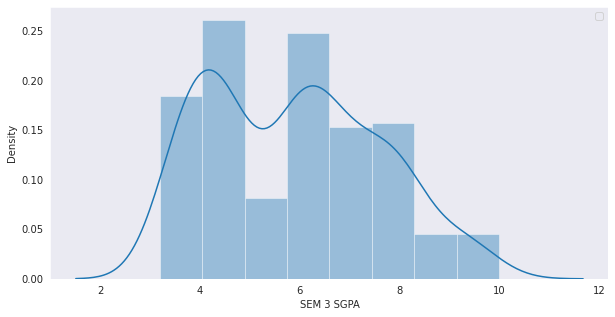

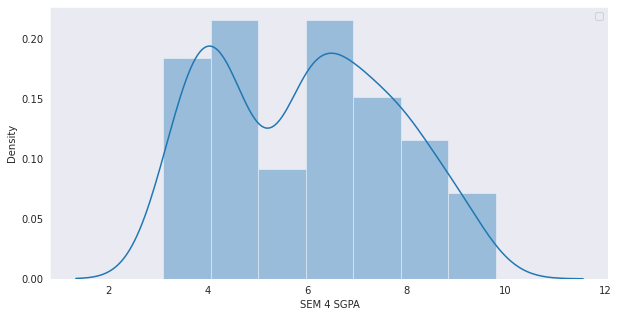

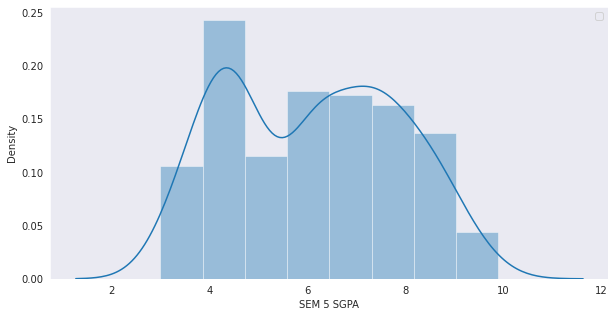

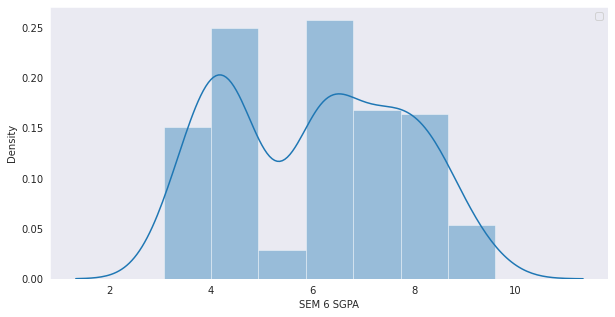

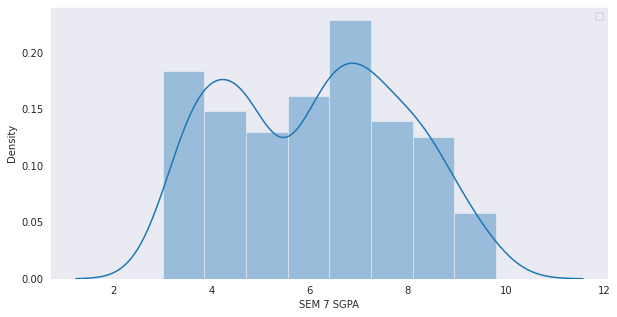

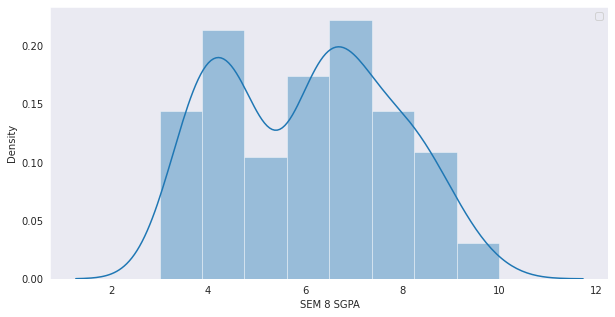

In [ ]:

for col in sgpa_cols:
#     fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 5))
    fig = plt.figure(figsize=(10, 5))
    
    sns.distplot(sgpa_data[col])
    plt.legend()
    plt.show()


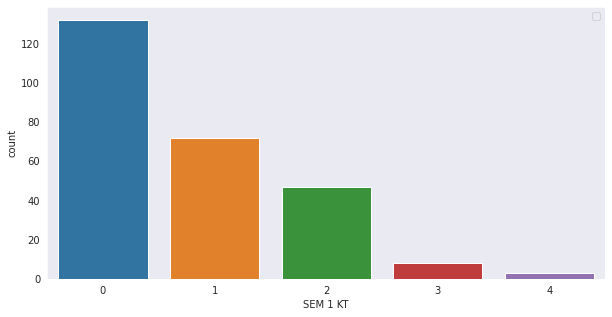

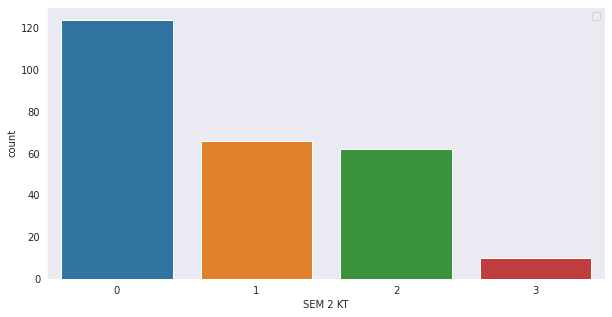

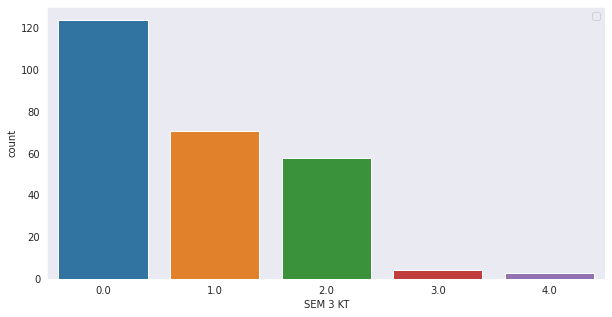

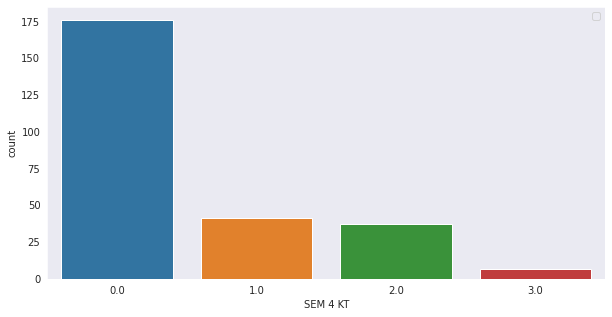

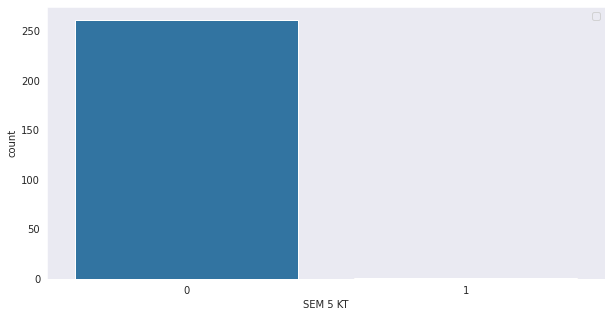

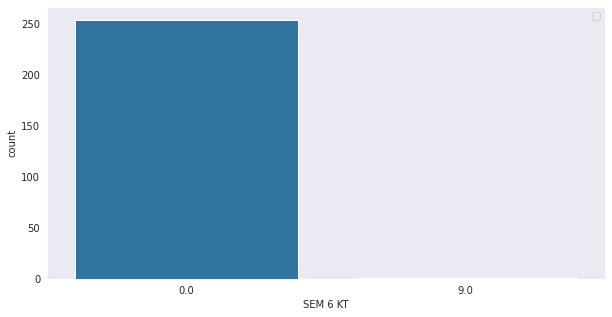

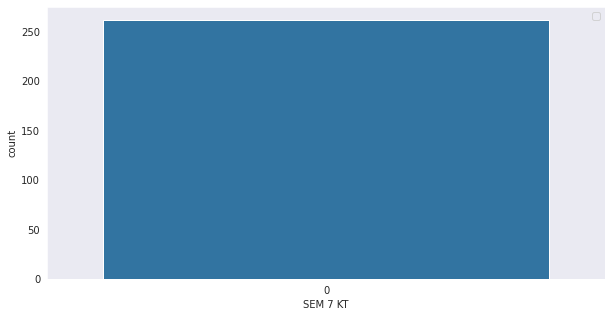

In [ ]:


kt_data = data.iloc[:,1:15:2]
kt_cols = kt_data.columns


for col in kt_cols:
    fig = plt.figure(figsize=(10, 5))
    
    sns.countplot(kt_data[col])
    plt.legend()
    plt.show()
   

## Study time analysis

*   Hours_On_Assignment
*   Hours_On_Studies



In [ ]:
data['Hours_On_Assignment'].value_counts()

0    235
1     27
Name: Hours_On_Assignment, dtype: int64

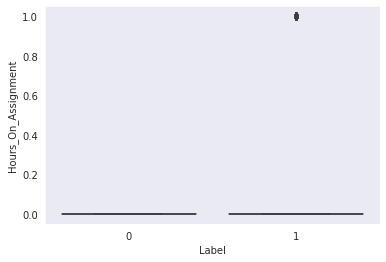

In [ ]:
sns.boxplot(data = data,x='Label',y='Hours_On_Assignment')
plt.show()

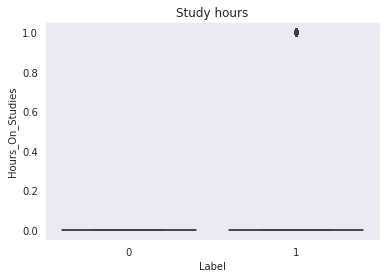

In [ ]:

sns.boxplot(y='Hours_On_Studies', x="Label", data=data)
plt.title("Study hours")
plt.show()

## Internet availability and speed

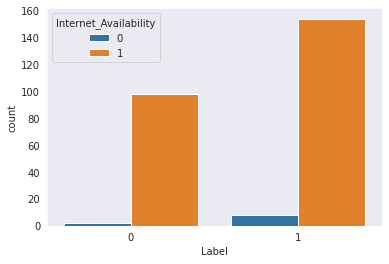

In [ ]:
sns.countplot(hue='Internet_Availability',x= 'Label',data = data)
plt.show()

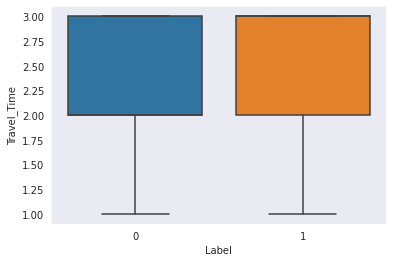

In [ ]:
sns.boxplot(data=data,x='Label',y='Travel_Time')
plt.show()

Removing constant features



*   constant features are the values same throuhout the dataset i.e. constant.These constant features do not add any value to the machine learning models.
*  Removing these values is the first step in feature selection
*   From the above data we can see that we have constant features in the dataset
*   These constant features can be removed by sklearn variance threshold
*   


In [ ]:
# # seperating features and targets
# X = data.drop('Label',axis=1)
# y = data['Label']

In [ ]:
# using sklearn variancethreshold to find constant features

from sklearn.feature_selection import VarianceThreshold
sel = VarianceThreshold(threshold=0)
sel.fit(data)  # fit finds the features with zero variance


VarianceThreshold(threshold=0)

In [ ]:
#length of non constant features
non_constant = len(data.columns[sel.get_support()])
constant_features = len(data.columns) - non_constant
print('non-constant features:',non_constant)
print('constant features:',constant_features)


non-constant features: 28
constant features: 2


In [ ]:
#constant features

constant_cols = [x for x in data.columns if x not in data.columns[sel.get_support()]]
constant_cols

['SEM 7 KT', 'Internet_Speed']

In [ ]:
#new dataframe after removing the constant columns
data.drop(constant_cols,axis=1,inplace=True)



In [ ]:
print('length of columns after removing constant features:',len(data.columns))

length of columns after removing constant features: 28


Removing quasi constants


*  Quasi constant features the values present majority of the time in the dataset
*  For this we are using same method like removing constants i.e. variance threshold with threshold value 98%
* We should be very careful while removing the quasi constant features...it may remove the outliers of the data





In [ ]:
sel = VarianceThreshold(threshold=0.02)  # 0.1 indicates 80% of observations approximately

sel.fit(data)

VarianceThreshold(threshold=0.02)

In [ ]:
# filtering the quasi constant columns
quasi_constant_cols = [x for x in data.columns if x not in data.columns[sel.get_support()]]
quasi_constant_cols

['SEM 5 KT']

In [ ]:
# new features after removing the quasi constat columns
data.drop(quasi_constant_cols,axis=1,inplace=True)


In [ ]:

data.columns

Index(['SEM 1 SGPA', 'SEM 1 KT', 'SEM 2 SGPA', 'SEM 2 KT', 'SEM 3 SGPA',
       'SEM 3 KT', 'SEM 4 SGPA', 'SEM 4 KT', 'SEM 5 SGPA', 'SEM 6 SGPA',
       'SEM 6 KT', 'SEM 7 SGPA', 'SEM 8 SGPA', 'Hours_On_Assignment',
       'Hours_On_Studies', 'Travel_Time', 'Attendance',
       'Internet_Availability', 'Mode_Of_Transportation', '2_hrs_lect',
       'Submissions', '5_hrs_lect', '5_hrs_pracs', 'Coaching_classes', 'Label',
       'Scocial_Skills', 'Average pointer'],
      dtype='object')

In [ ]:
#number of columns after quasi constant removal
print('final length of columns after constant removal:',len(data.columns))


final length of columns after constant removal: 27


# Filter methods


1. Filter methods generally a part of preprocessing of data(removing constants and removing quasi constants)
2. These methods generally do not use algorithms to select the important features instead they use statistical tests
3. filter methods usually include:
> Correlation matrix.   
> ANOVA(Analysis of variance).   
> Univariate selection methods. 
4.The characterstics of filter method are:
> They are computationally inexpensive
> Well suited for quick removal of irrelavant features
> low prediction power
















**1.1 Filter method**

1.Correlation matrix

*   How close two variables are to have linear relationship
*   When two features have high correlation they will have same effect on dependent variable.... hence we can drop one of them







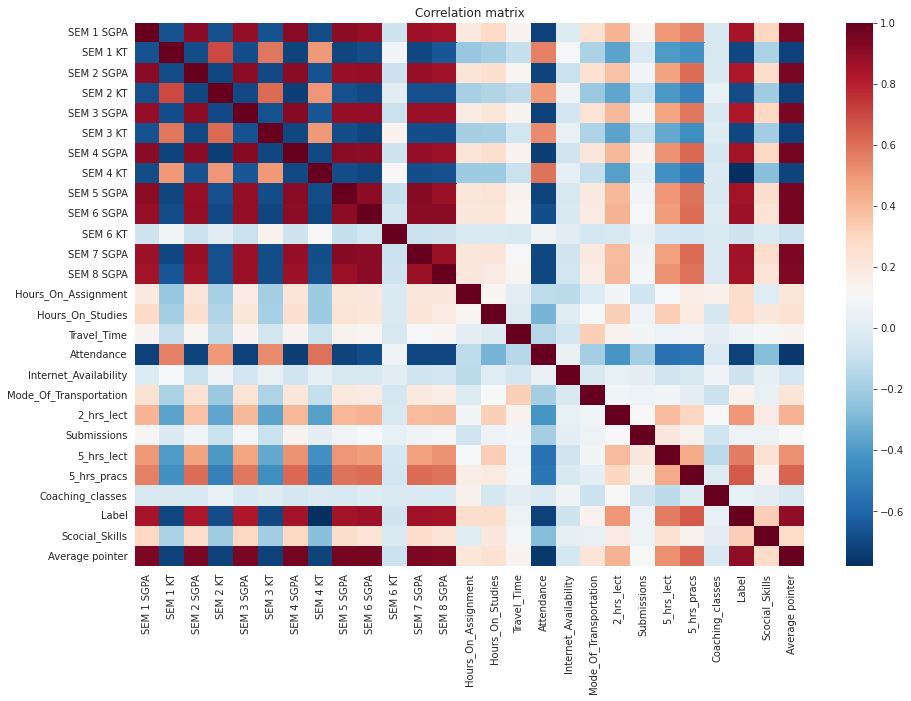

In [ ]:
plt.figure(figsize=(15,10))
corr = data.corr()
sns.heatmap(corr,cmap="RdBu_r",annot=False)
plt.title('Correlation matrix')
plt.show()

In [ ]:
#selecting the columns with higher correlation
col = np.full((corr.shape[0],),True,dtype=bool)

for i in range(corr.shape[0]):
  for j in range(i+1,corr.shape[0]):
    if corr.iloc[i,j] >= 0.8:
      if col[j]:
        col[j] = False

In [ ]:
#new columns set
selected_col = data.columns[col]
selected_col

Index(['SEM 1 SGPA', 'SEM 1 KT', 'SEM 2 KT', 'SEM 3 KT', 'SEM 4 KT',
       'SEM 6 KT', 'Hours_On_Assignment', 'Hours_On_Studies', 'Travel_Time',
       'Attendance', 'Internet_Availability', 'Mode_Of_Transportation',
       '2_hrs_lect', 'Submissions', '5_hrs_lect', '5_hrs_pracs',
       'Coaching_classes', 'Scocial_Skills'],
      dtype='object')

In [ ]:
print('length of selected columns:',len(selected_col))

length of selected columns: 18


In [ ]:
#dataframe with new coluns
data_corr = data[selected_col]

In [ ]:
#data frame overview
data_corr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 262 entries, 0 to 261
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   SEM 1 SGPA              260 non-null    float64
 1   SEM 1 KT                262 non-null    int64  
 2   SEM 2 KT                262 non-null    int64  
 3   SEM 3 KT                260 non-null    float64
 4   SEM 4 KT                261 non-null    float64
 5   SEM 6 KT                255 non-null    float64
 6   Hours_On_Assignment     262 non-null    int64  
 7   Hours_On_Studies        262 non-null    int64  
 8   Travel_Time             262 non-null    int64  
 9   Attendance              262 non-null    int64  
 10  Internet_Availability   262 non-null    int64  
 11  Mode_Of_Transportation  262 non-null    int64  
 12  2_hrs_lect              262 non-null    int64  
 13  Submissions             262 non-null    int64  
 14  5_hrs_lect              262 non-null    in

In [ ]:
# calculating the sum of null values
data_corr.isna().sum()

SEM 1 SGPA                2
SEM 1 KT                  0
SEM 2 KT                  0
SEM 3 KT                  2
SEM 4 KT                  1
SEM 6 KT                  7
Hours_On_Assignment       0
Hours_On_Studies          0
Travel_Time               0
Attendance                0
Internet_Availability     0
Mode_Of_Transportation    0
2_hrs_lect                0
Submissions               0
5_hrs_lect                0
5_hrs_pracs               0
Coaching_classes          0
Scocial_Skills            0
dtype: int64

In [ ]:
# filling the null values with forward filling method
data_corr = data_corr.fillna(method="ffill")
data_corr.columns

Index(['SEM 1 SGPA', 'SEM 1 KT', 'SEM 2 KT', 'SEM 3 KT', 'SEM 4 KT',
       'SEM 6 KT', 'Hours_On_Assignment', 'Hours_On_Studies', 'Travel_Time',
       'Attendance', 'Internet_Availability', 'Mode_Of_Transportation',
       '2_hrs_lect', 'Submissions', '5_hrs_lect', '5_hrs_pracs',
       'Coaching_classes', 'Scocial_Skills'],
      dtype='object')

In [ ]:
X_corr = data_corr
y = data['Label']

In [ ]:
len(y),len(X_corr)

(262, 262)

Train and test split

In [ ]:
# splitting the data into train and test
X_train,X_test,y_train,y_test = train_test_split(data_corr.values,y.values,test_size=0.2)

In [ ]:
# length of train and test set
X_train.shape,X_test.shape

((209, 18), (53, 18))

Naive Bayes classifier

In [ ]:
#creating Naive Bayes object
naive_bayes = GaussianNB()


In [ ]:
#training the model
naive_bayes.fit(X_train,y_train)

GaussianNB()

In [ ]:
naive_bayes.score(X_test,y_test)

0.9811320754716981

In [ ]:
nb_pred = naive_bayes.predict(X_test)

KNN

In [ ]:
# creating KNN
knn = KNeighborsClassifier(n_neighbors=3)

In [ ]:
#training the model
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
#test score
knn.score(X_test,y_test)

1.0

In [ ]:
#knn predictions
knn_pred = knn.predict(X_test)

[link text](https://)⛔ 
**Correlation doesn't capture non linear relationships**






Univariate feature selection

In [ ]:
data.isnull().sum()

SEM 1 SGPA                2
SEM 1 KT                  0
SEM 2 SGPA                0
SEM 2 KT                  0
SEM 3 SGPA                1
SEM 3 KT                  2
SEM 4 SGPA                0
SEM 4 KT                  1
SEM 5 SGPA                0
SEM 6 SGPA                0
SEM 6 KT                  7
SEM 7 SGPA                0
SEM 8 SGPA                0
Hours_On_Assignment       0
Hours_On_Studies          0
Travel_Time               0
Attendance                0
Internet_Availability     0
Mode_Of_Transportation    0
2_hrs_lect                0
Submissions               0
5_hrs_lect                0
5_hrs_pracs               0
Coaching_classes          0
Label                     0
Scocial_Skills            0
Average pointer           3
dtype: int64

In [ ]:
data = data.fillna(method='ffill')


In [ ]:

X = data.drop('Label',axis=1)
y = data['Label']

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [ ]:
selector = SelectKBest(f_classif, k=7)
selector.fit(X_train, y_train)
scores = -np.log10(selector.pvalues_)
scores /= scores.max()

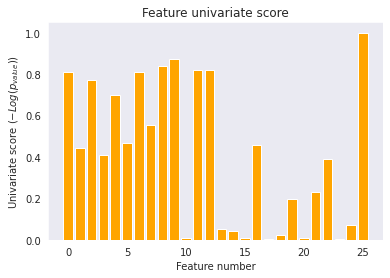

In [ ]:
X_indices = np.arange(X_train.shape[-1])
plt.bar(x=X_indices, height=scores,color='orange')
plt.title("Feature univariate score")
plt.xlabel("Feature number")
plt.ylabel(r"Univariate score ($-Log(p_{value})$)")
plt.show()

without univariate selection

In [ ]:

clf = make_pipeline(MinMaxScaler(), LinearSVC())
clf.fit(X_train, y_train)
print(
    "Classification accuracy without selecting features: {:.3f}".format(
        clf.score(X_test, y_test)
    )
)

svm_weights = np.abs(clf[-1].coef_).sum(axis=0)
svm_weights /= svm_weights.sum()

Classification accuracy without selecting features: 1.000


After univariate selection

In [ ]:
clf_selected = make_pipeline(SelectKBest(f_classif, k=7), MinMaxScaler(), LinearSVC())
clf_selected.fit(X_train, y_train)
print(
    "Classification accuracy after univariate feature selection: {:.3f}".format(
        clf_selected.score(X_test, y_test)
    )
)

svm_weights_selected = np.abs(clf_selected[-1].coef_).sum(axis=0)
svm_weights_selected /= svm_weights_selected.sum()

Classification accuracy after univariate feature selection: 1.000


In [ ]:
X_indices[selector.get_support()]

array([ 0,  6,  8,  9, 11, 12, 25])

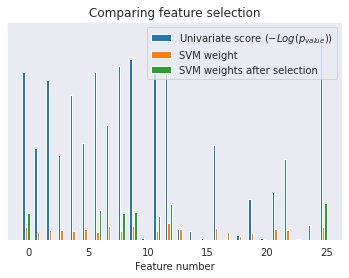

In [ ]:
plt.bar(
    X_indices - 0.45, scores, width=0.2, label=r"Univariate score ($-Log(p_{value})$)"
)

plt.bar(X_indices - 0.25, svm_weights, width=0.2, label="SVM weight")

plt.bar(
    X_indices[selector.get_support()] - 0.05,
    svm_weights_selected,
    width=0.2,
    label="SVM weights after selection",
)

plt.title("Comparing feature selection")
plt.xlabel("Feature number")
plt.yticks(())
plt.axis("tight")
plt.legend(loc="upper right")
plt.show()



*   A highly correlated feature is given high value
*   Less correlated feature is given low weight
-------------------------------------------------------------------------------





## Wrapper method   


Unlike filter methods Wrapper methods use series of models to generate subset of features.  
Based on the previous training model observations to will add or remove the new features

 
**1.Recursive Feature Elimination with cross validation:**  
RFE eleminates the features 0 to N iteratively based on accuracy score using cross validation

In [ ]:
X_train_std = StandardScaler().fit_transform(X_train)
X_test_std = StandardScaler().fit_transform(X_test)

In [ ]:
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
# svc = SVC(kernel="linear")
estimator = DecisionTreeClassifier() 
# The "accuracy" scoring shows the proportion of correct classifications

min_features_to_select =5  # Minimum number of features to consider
rfecv = RFECV(
    estimator=estimator,
    step=1,
    cv=StratifiedKFold(5),
    scoring="accuracy",
    min_features_to_select=min_features_to_select,
)
rfecv.fit(X_train_std, y_train)


RFECV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
      estimator=DecisionTreeClassifier(), min_features_to_select=5,
      scoring='accuracy')

In [ ]:

print("Optimal number of features : %d" % rfecv.n_features_)


Optimal number of features : 5


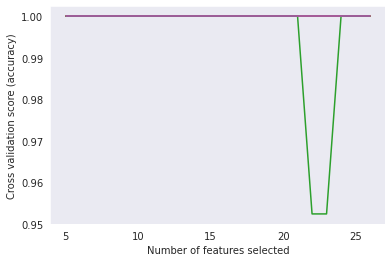

In [ ]:

# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (accuracy)")
plt.plot(
    range(min_features_to_select, len(rfecv.grid_scores_) + min_features_to_select),
    rfecv.grid_scores_,
)
plt.show()

**2.Sequential Forward Selection(SFS)**

In [ ]:
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import RidgeCV
ridge = RidgeCV(alphas=np.logspace(-6, 6, num=5)).fit(X_train_std, y_train)


In [ ]:

#forward feature selection
sfs_forward = SequentialFeatureSelector(
    ridge, n_features_to_select=7, direction="forward"
).fit(X_train_std, y_train)


In [ ]:
#bckward feature selection
sfs_backward = SequentialFeatureSelector(
    ridge, n_features_to_select=7, direction="backward"
).fit(X_train_std, y_train)


In [ ]:
#creating array of feature names
feature_names = np.array(X.columns)

In [ ]:

print(
    "Features selected by forward sequential selection: "
    f"{feature_names[sfs_forward.get_support()]}"
)
print(
    "Features selected by backward sequential selection: "
    f"{feature_names[sfs_backward.get_support()]}"
)


Features selected by forward sequential selection: ['SEM 1 KT' 'SEM 3 KT' 'SEM 4 KT' 'SEM 8 SGPA' '2_hrs_lect' '5_hrs_pracs'
 'Average pointer']
Features selected by backward sequential selection: ['SEM 1 SGPA' 'SEM 1 KT' 'SEM 3 KT' 'SEM 4 KT' 'SEM 8 SGPA' '2_hrs_lect'
 '5_hrs_pracs']


# models


In [ ]:
X = data[['SEM 1 KT','SEM 3 KT','SEM 4 KT','5_hrs_lect','5_hrs_pracs',
 'Scocial_Skills','Average pointer']]


In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state = 42)

In [ ]:
#Naive Bayes
nb_2 = GaussianNB()
nb_2.fit(X_train,y_train)

GaussianNB()

In [ ]:
#test score
nb_2.score(X_test,y_test)

1.0

In [ ]:
#Naive Bayes predictions
nb_pred_2 = nb_2.predict(X_test)

In [ ]:
#KNN
knn_2 = KNeighborsClassifier(n_neighbors=4)
knn_2.fit(X_train,y_train)


KNeighborsClassifier(n_neighbors=4)

In [ ]:
#test score
knn_2.score(X_test,y_test)

1.0

In [ ]:
#knn predictions
knn_pred_2 = knn_2.predict(X_test)

Classification report

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,nb_pred))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97        16
           1       1.00      0.97      0.99        37

    accuracy                           0.98        53
   macro avg       0.97      0.99      0.98        53
weighted avg       0.98      0.98      0.98        53



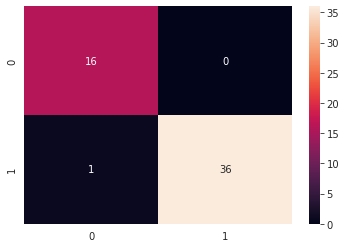

In [ ]:
cm = confusion_matrix(y_test, nb_pred)
sns.heatmap(cm,annot=True)
plt.show()